<a href="https://colab.research.google.com/github/Josepholaidepetro/Volve_ML/blob/main/models/FINAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install lasio

In [ ]:
from google.colab import files
files.upload()

Saving formation_eval.py to formation_eval.py


{'formation_eval.py': b'"""\r\nformation evaluation\r\nAuthor: Olaide Joseph\r\nEmail: Josepholaide10@gmail.com\r\n"""\r\n\r\nimport lasio\r\nimport numpy as np\r\nimport matplotlib.pyplot as plt\r\nimport pandas as pd\r\nimport matplotlib.ticker as ticker\r\nimport warnings\r\nplt.style.use(\'ggplot\')\r\nwarnings.filterwarnings("ignore")\r\n\r\n\r\nclass formation_eval:\r\n    """\r\n        Evaluates the formation and determines formation characteristic such as shale volume,\r\n        reservoir and non-reservoir zones.\r\n        args::\r\n            datapath: LAS datapath\r\n            mnemonics: list of well log mnemonics, if \'None\', density, neutron, Gamma ray, SP and resistivity\r\n            logs are passed if available.\r\n        """\r\n\r\n    def __init__(self, datapath: str = None, mnemonics: list = None):\r\n        """\r\n\r\n        :type datapath: str\r\n        :type mnemonics: list\r\n\r\n        """\r\n        if mnemonics is None:\r\n            self.mnemonic

In [ ]:
import sys
import os
import lasio
import warnings

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as ticker
import seaborn as sns
sns.set_style('darkgrid')
sys.path.append('/content/formation_eval.py')
warnings.filterwarnings("ignore")
%matplotlib inline

# File Path

In [ ]:
def get_file(path):
  files=os.listdir(path)
  train_files = sorted([os.path.join(path, f) for f in files])
  return train_files

train_dir = '/content/drive/MyDrive/volve_15_9-F'
train_files = get_file(train_dir)

In [ ]:
def to_dataframe(files):
  df_well = []
  df_keys = []
  df_cuvs = []
  for file in files:
      df = lasio.read(file)
      df_keys.append(df.keys())
      df_cuvs.append(df.curves)
      well = df.df()
      well.reset_index(inplace=True)
      df_well.append(well)
  return df_well, df_keys, df_cuvs


df_well, df_keys, df_cuvs = to_dataframe(train_files) 

well1, well2, well3, well4, well5 = df_well

# Dataframe keys and curves

In [ ]:
for i in df_keys:
  print(i)

['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RHOB', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'DT', 'DTS', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']
['DEPTH', 'ABDCQF01', 'ABDCQF02', 'ABDCQF03', 'ABDCQF04', 'BS', 'CALI', 'DRHO', 'GR', 'NBGRCFM', 'NPHI', 'PEF', 'RACEHM', 'RACELM', 'RD', 'RHOB', 'RM', 'ROP', 'RPCEHM', 'RPCELM', 'RT']


In [ ]:
df_cuvs[0]

[CurveItem(mnemonic="DEPTH", unit="M", value="00 001 00 00", descr="0  Depth", original_mnemonic="DEPTH", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF01", unit="g/cm3", value="00 000 00 00:   1  ABDCQF01:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF01", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF02", unit="g/cm3", value="00 000 00 00:   2  ABDCQF02:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF02", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF03", unit="g/cm3", value="00 000 00 00:   3  ABDCQF03:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF03", data.shape=(35735,)),
 CurveItem(mnemonic="ABDCQF04", unit="g/cm3", value="00 000 00 00:   4  ABDCQF04:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="ABDCQF04", data.shape=(35735,)),
 CurveItem(mnemonic="BS", unit="inches", value="00 000 00 00:   5  BS:COMPOSITE:rC:NONE", descr="v1", original_mnemonic="BS", data.shape=(35735,)),
 CurveItem(mnemonic="CALI", unit="inches", value="70 280 00 01: 

# Importing Formation Evaluation Module

In [ ]:
from formation_eval import formation_eval
formation_eval1 = formation_eval(datapath=None, mnemonics=None)

The module takes a particular amount of logs for evaluation, usually the important ones

In [ ]:
df_well1 = []
for i in range(len(df_well)):
    df = formation_eval1.well_logs(dataframe=df_well[i])
    df_well1.append(df)
    
well1, well2, well3, well4, well5 = df_well1

In [ ]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].isnull().sum())
  print('\n')

well0
DEPTH        0
ROP        386
GR         144
CALI     24054
BS           0
RD         570
RT         570
RM         570
NPHI     24138
RHOB     24110
DRHO     24047
DT       24260
PEF      24110
dtype: int64


well1
DEPTH        0
ROP        407
GR         147
CALI     30275
BS           0
RD         961
RT         744
RM         744
NPHI     30352
RHOB     30326
DRHO     30280
PEF      30326
dtype: int64


well2
DEPTH        0
ROP        884
GR         690
CALI     24616
BS           0
RT        1150
NPHI     24837
RHOB     24810
DRHO     24714
DT       25137
PEF      24810
dtype: int64


well3
DEPTH        0
ROP        807
GR         693
CALI     29672
BS           0
RD        1281
RT       24653
RM        1281
NPHI     29778
RHOB     29750
DRHO     29665
DT       28929
PEF      29750
dtype: int64


well4
DEPTH        0
ROP        805
GR         646
CALI     29256
BS           0
RD        1356
RT        1332
RM        1332
NPHI     29378
RHOB     29352
DRHO     29258
PEF      2

In [ ]:
for i in range(len(df_well1)):
  print('well' + str(i))
  print(df_well1[i].shape)
  print('\n')

well0
(35735, 13)


well1
(45818, 12)


well2
(35361, 11)


well3
(33191, 13)


well4
(39481, 12)




In [ ]:
def intersection(lst1, lst2): 
    lst3 = [value for value in lst1 if value not in lst2] 
    return lst3 

intersection(df_keys[3], df_keys[2]), intersection(df_keys[0], df_keys[2]) 

(['NBGRCFM', 'RD', 'RM'], ['RD', 'RM'])

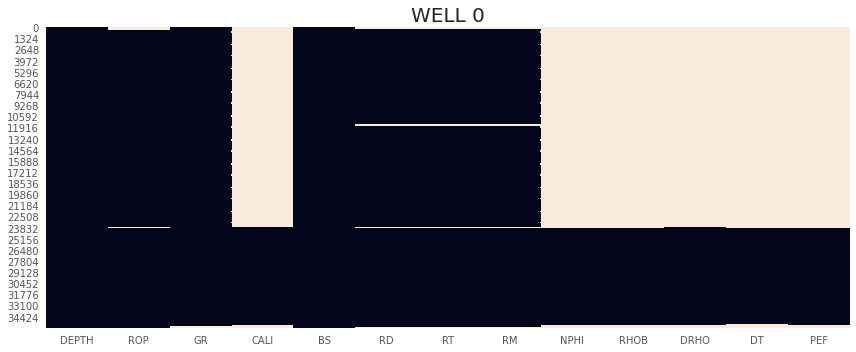

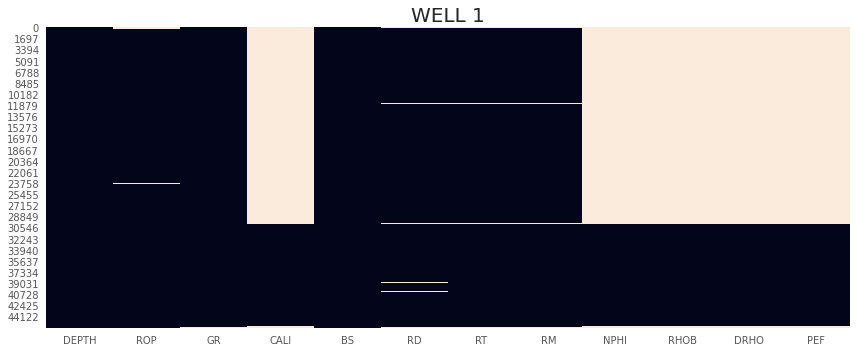

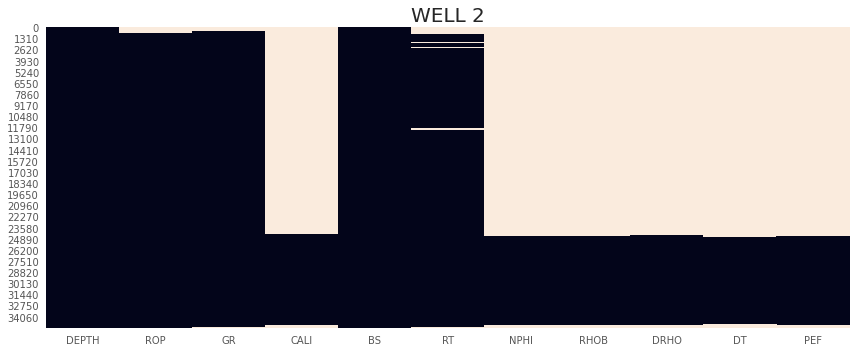

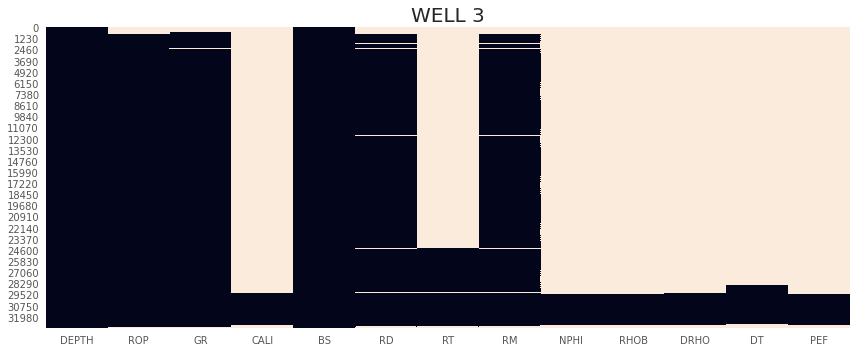

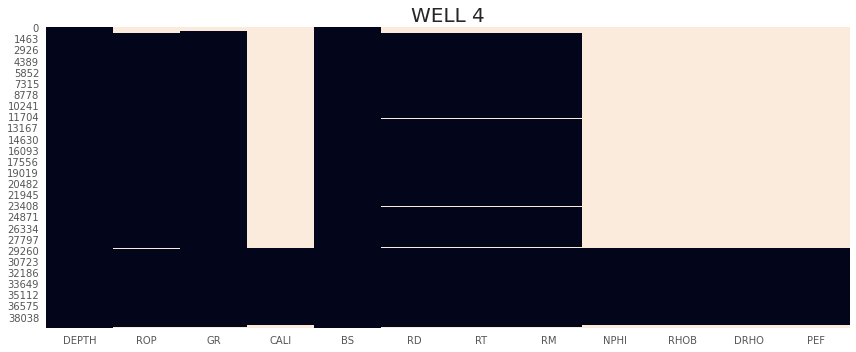

In [ ]:
for i in range(len(df_well)):
  plt.figure(figsize=(12,5))
  sns.heatmap(df_well1[i].isnull(), cbar=False)
  plt.title("WELL {}".format(i), size=20)
  plt.tight_layout()
  plt.show()

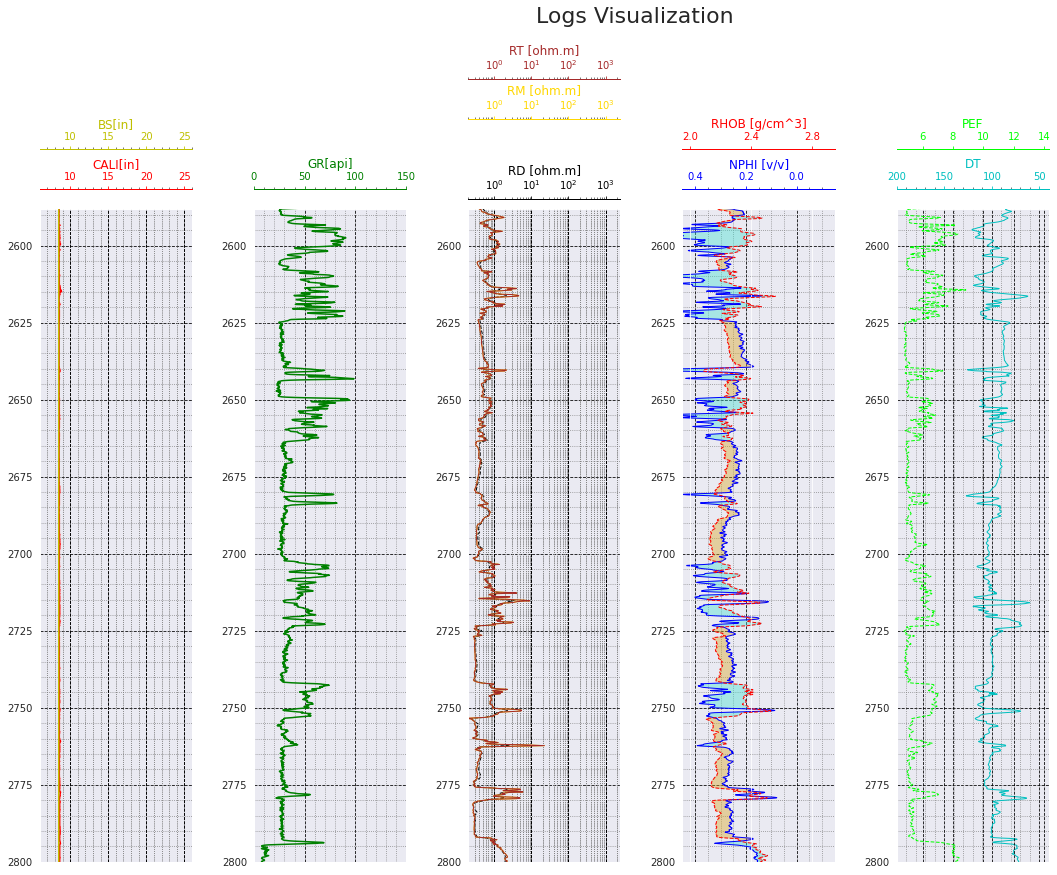

In [ ]:
formation_eval1.log_viz(well1,2588, 2800, plotsize=(18,12))
plt.savefig('preddt2')

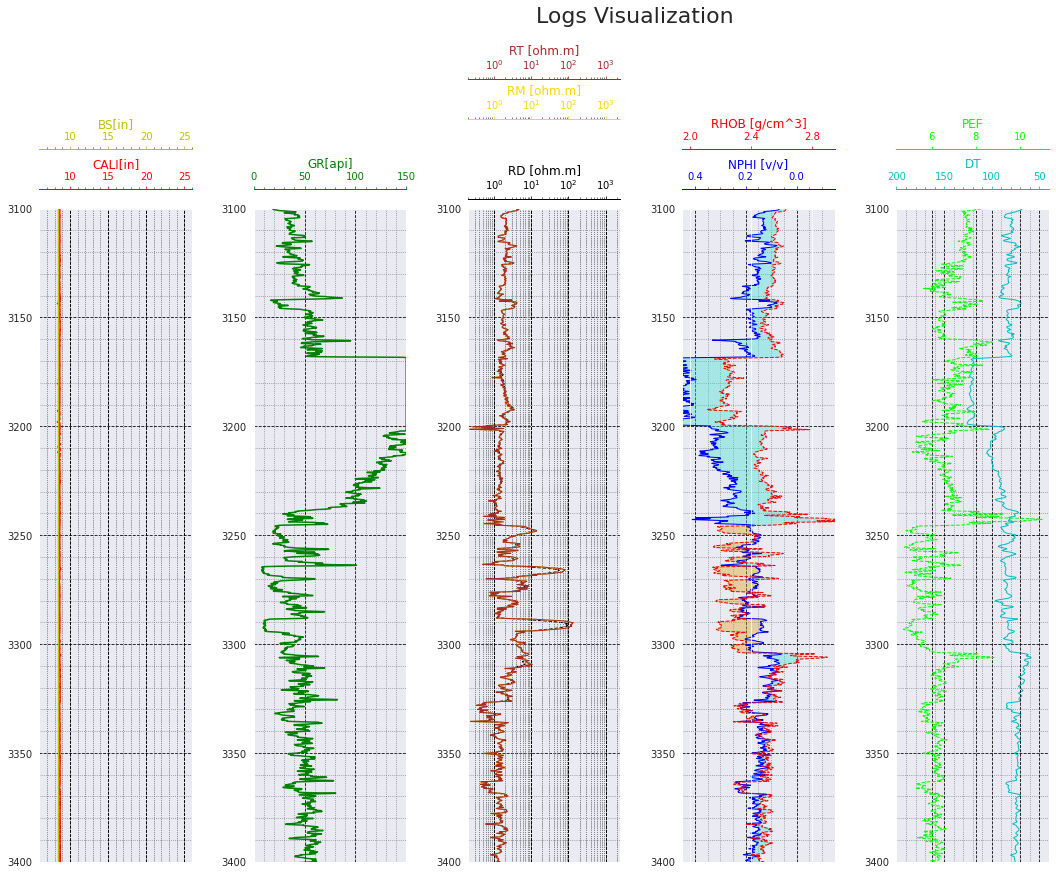

In [ ]:
formation_eval1.log_viz(well4,3100, 3400, plotsize=(18,12))

# Data Science & Machine Learning around the Sonic Log

For training:

    rows w/o Nan value
    well1: 24000:34000
    well4: 29800:32700

For prediction:

    rows w/o Nan value
    well3: 25000:34000
    

 


In [ ]:
# the train data
well1_new = well1.iloc[24000:34000]
well4_new = well4.iloc[29800:32700]
#well5_new = well5.iloc[30000:38500]
#well2_new = well2.iloc[31000:44000]

# the test data
well3_new = well3.iloc[25000:34000]

In [ ]:
well1_new['label'] = 1
well4_new['label'] = 0

In [ ]:
len(well1_new), len(well3_new), len(well4_new)

(10000, 9000, 2900)

In [ ]:
intersection(df_keys[3], df_keys[0]), intersection(df_keys[0], df_keys[2]), intersection(df_keys[3], df_keys[2]) 

(['NBGRCFM'], ['RD', 'RM'], ['NBGRCFM', 'RD', 'RM'])

In [ ]:
train_df =well1_new.append(well4_new)
test_df = well3_new.copy()

In [ ]:
train_df.isna().sum()

DEPTH    0
ROP      0
GR       0
CALI     0
BS       0
RD       0
RT       0
RM       0
NPHI     0
RHOB     0
DRHO     0
DT       0
PEF      0
label    0
dtype: int64

In [ ]:
train_df

DEPTH      ROP       GR    CALI  ...    DRHO       DT     PEF  label
24000  2588.5  13.8200  25.6860  8.5470  ...  0.0440  83.7640  4.9770      1
24001  2588.6  13.8200  24.8550  8.5470  ...  0.0460  82.5330  4.9530      1
24002  2588.7  13.7910  25.0200  8.5470  ...  0.0470  81.4130  4.9390      1
24003  2588.8  13.7630  25.6290  8.5470  ...  0.0490  80.2620  4.9480      1
24004  2588.9  13.7330  26.6650  8.5470  ...  0.0520  79.4400  4.9730      1
...       ...      ...      ...     ...  ...     ...      ...     ...    ...
32695  3415.4  26.7975  57.4222  8.6966  ...  0.0413  77.2062  5.3850      0
32696  3415.5  26.5149  52.7125  8.5791  ...  0.0422  77.4357  5.3654      0
32697  3415.6  26.2336  48.9718  8.5791  ...  0.0438  77.4610  5.2489      0
32698  3415.7  25.9523  49.5681  8.5791  ...  0.0447  77.4195  5.1531      0
32699  3415.8  25.6728  51.4344  8.5791  ...  0.0431  77.2300  5.1387      0

[12900 rows x 14 columns]

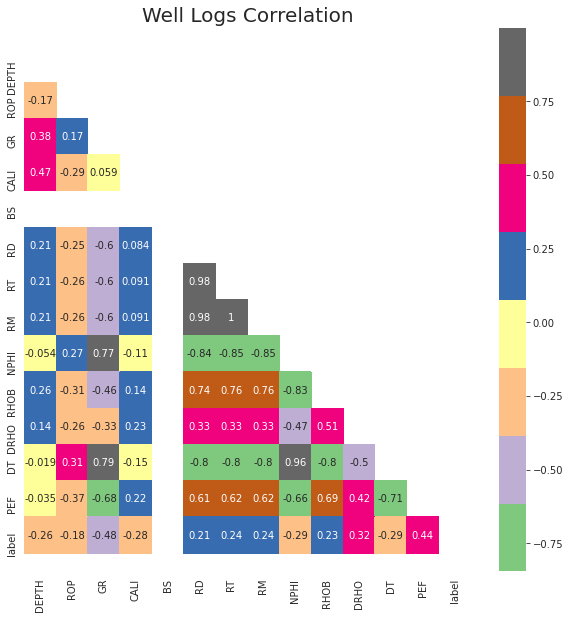

In [ ]:
datacorr = train_df.corr(method='spearman')
def df_corrs(datacorr):
  # Changing correlation matrix shape for masking
  matrix = np.triu(datacorr)


  # Generating heatmap for the data correlation
  plt.figure(figsize=(20,14))
  sns.set_style("whitegrid")
  sns.heatmap(datacorr, annot=True , mask=matrix, cmap='Accent')


  # fix for matplotlib bug that cuts off top/bottom of seaborn visualizations
  bottom, top = plt.ylim() # discover the values for bottom and top
  bottom += 0.5
  top -= 0.5
  plt.ylim(bottom, top) # update the ylim values for bottom and top after addition and subtraction operation

  # changing xtick rotation
  plt.xticks(rotation=90)

  # show ttle
  plt.title("Well Logs Correlation", size=20)

  # show plot
  plt.show()

df_corrs(datacorr)

In [ ]:
def get_redundant_pairs(train_df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = train_df.columns
    for i in range(0, train_df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop


# Function to get top correlations 
def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(datacorr, 40))


Top Absolute Correlations
RT    RM       1.000000
RD    RT       0.999889
      RM       0.999889
NPHI  DT       0.998471
RM    NPHI     0.987597
RT    NPHI     0.987597
RD    NPHI     0.986687
NPHI  RHOB     0.985829
RHOB  DT       0.985095
RM    DT       0.980471
RT    DT       0.980471
RD    DT       0.979302
RM    RHOB     0.972185
RT    RHOB     0.972184
DT    PEF      0.971322
RD    RHOB     0.971234
GR    PEF      0.962200
NPHI  PEF      0.960147
GR    DT       0.956947
      NPHI     0.951887
RHOB  PEF      0.949099
RT    PEF      0.928258
RM    PEF      0.928258
RD    PEF      0.925683
GR    RT       0.920886
      RM       0.920886
      RD       0.918619
      RHOB     0.902822
DRHO  DT       0.866286
RHOB  DRHO     0.861004
DRHO  PEF      0.854880
NPHI  DRHO     0.850778
GR    label    0.812937
      DRHO     0.812177
RM    DRHO     0.783419
RT    DRHO     0.783418
RD    DRHO     0.780761
ROP   PEF      0.755604
PEF   label    0.749939
ROP   RHOB     0.736244
dtype: float64

In [ ]:
keeptrain = train_df.copy()
keeptest = test_df.copy()

In [ ]:
keeptrain.to_csv('train.csv')
keeptest.to_csv('test.csv')

In [ ]:
train_df.drop(['DEPTH', 'BS', 'RD', 'ROP', 'RM', 'DRHO'], axis=1, inplace=True)
test_df.drop(['DEPTH', 'BS', 'ROP', 'DRHO'],axis=1,  inplace=True)

In [ ]:
datacorr = train_df.corr(method='spearman')

print("Top Absolute Correlations")
print(get_top_abs_correlations(datacorr, 40))

Top Absolute Correlations
NPHI  DT       0.998747
RT    NPHI     0.993469
NPHI  RHOB     0.989385
RT    DT       0.988934
RHOB  DT       0.987146
RT    RHOB     0.981088
GR    PEF      0.980320
DT    PEF      0.978688
NPHI  PEF      0.969878
GR    DT       0.964639
      NPHI     0.959947
RHOB  PEF      0.951252
RT    PEF      0.947592
GR    RT       0.943116
      RHOB     0.920909
      label    0.816658
PEF   label    0.734358
DT    label    0.679478
NPHI  label    0.676174
RT    label    0.640381
RHOB  label    0.617104
CALI  label    0.321778
      DT       0.277406
      RHOB     0.269155
      NPHI     0.257508
      PEF      0.254014
      RT       0.236654
GR    CALI     0.134605
dtype: float64


In [ ]:
train_df.shape

(12900, 8)

In [ ]:
test_df.shape

(9000, 7)

In [ ]:
plotcol = ['GR', 'RT', 'NPHI', 'RHOB', 'PEF', 'DT', 'CALI']

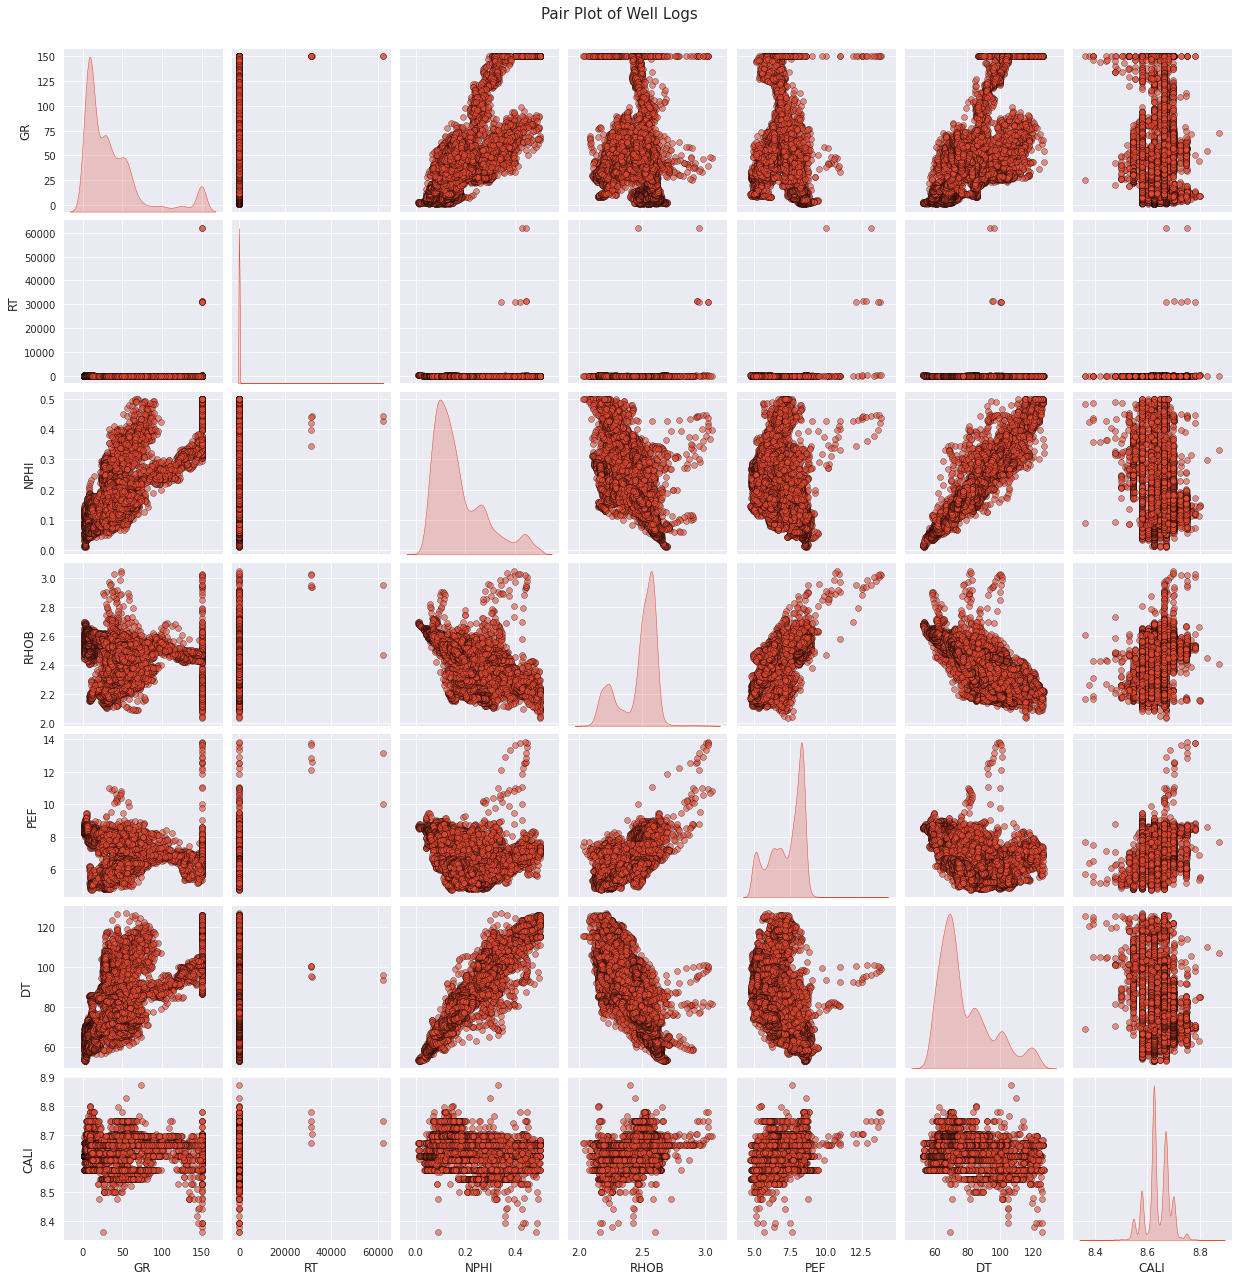

In [ ]:
# Create a pair plot function with a density plot of the 
# diagonal and format the scatter plots.

def df_pairplot(df, cols):
  sns.set_style('darkgrid')
  sns.pairplot(df, vars=cols, diag_kind='kde', palette='mako'
              ,plot_kws = {'alpha': 0.6, 's': 35, 'edgecolor': 'k'})

  # Title 
  plt.suptitle('Pair Plot of Well Logs', size = 15, y=1.02)

df_pairplot(train_df, plotcol)
plt.savefig('pplot')

In [ ]:
# check for Nan Values
train_df.isna().sum()

GR       0
CALI     0
RT       0
NPHI     0
RHOB     0
DT       0
PEF      0
label    0
dtype: int64

In [ ]:
# If Nan, drop
train_df.dropna(inplace=True)

# Logs transformation and preprocessing

In [ ]:
# transform the RT to logarithmic
train_df['RT'] = np.log10(train_df['RT'])
test_df['RT'] = np.log10(test_df['RT'])

In [ ]:
train_df.head()

GR   CALI        RT   NPHI   RHOB      DT    PEF  label
24000  25.686  8.547 -0.346787  0.236  2.209  83.764  4.977      1
24001  24.855  8.547 -0.341989  0.226  2.224  82.533  4.953      1
24002  25.020  8.547 -0.342944  0.218  2.236  81.413  4.939      1
24003  25.629  8.547 -0.340084  0.213  2.245  80.262  4.948      1
24004  26.665  8.547 -0.335358  0.211  2.253  79.440  4.973      1

In [ ]:
from sklearn.preprocessing import PowerTransformer, StandardScaler
# perform a yeo-johnson transform of the train dataset
ptrain = PowerTransformer(method='yeo-johnson')
train_df_yj = ptrain.fit_transform(train_df.drop('DT', axis=1))

train_df_yj_norm = pd.DataFrame(train_df_yj, columns=train_df.columns.drop('DT'))
y_train = train_df['DT']

In [ ]:
# perform a yeo-johnson transform of the test dataset
ptest = PowerTransformer(method='yeo-johnson')
test_df_yj = ptest.fit_transform(test_df.drop('DT', axis=1))

test_df_yj_norm = pd.DataFrame(test_df_yj, columns=test_df.columns.drop('DT'))
y_test = test_df['DT']

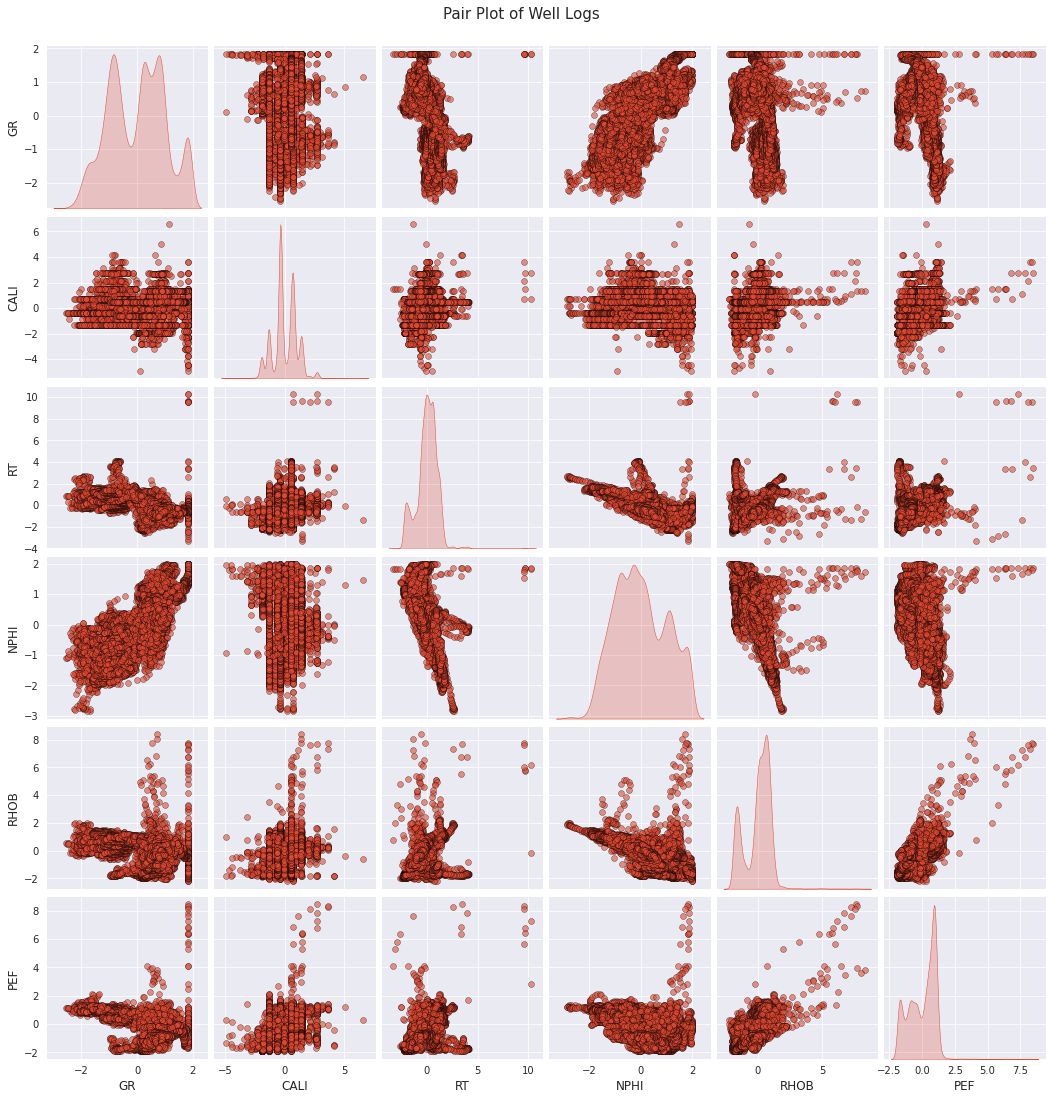

In [ ]:
# a pair plot function with a density plot of the 
# diagonal and format the scatter plots.
df_pairplot(train_df_yj_norm, train_df_yj_norm.columns.drop('label'))

# Outlier detection and removal
https://machinelearningmastery.com/model-based-outlier-detection-and-removal-in-python/

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM

In [ ]:
# Method 1: Isolation Forest
iso = IsolationForest(contamination=0.1)
yhat = iso.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_iso = train_df_yj_norm[mask]
y_train_iso = y_train[mask]


# Method 2: Minimum Covariance Determinant
ee = EllipticEnvelope(contamination=0.01)
yhat = ee.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_ee = train_df_yj_norm[mask]
y_train_ee = y_train[mask]

# Method 3: Local Outlier Factor
lof = LocalOutlierFactor(contamination=0.2)
yhat = lof.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_lof = train_df_yj_norm[mask]
y_train_lof = y_train[mask]

# Method 4: One-class SVM
svm = OneClassSVM(nu=0.13)
yhat = svm.fit_predict(train_df_yj_norm)
mask = yhat != -1
train_df_svm = train_df_yj_norm[mask]
y_train_svm = y_train[mask]


In [ ]:
print('before outliers removed                       :', len(train_df_yj_norm))
print('after outliers removed with Isolation Forest  :', len(train_df_iso))
print('after outliers removed with Min. Covariance   :', len(train_df_ee))
print('after outliers removed with Outlier Factor    :', len(train_df_lof))
print('after outliers removed with One-class SVM     :', len(train_df_svm))

before outliers removed                       : 12900
after outliers removed with Isolation Forest  : 11610
after outliers removed with Min. Covariance   : 12771
after outliers removed with Outlier Factor    : 10320
after outliers removed with One-class SVM     : 11223


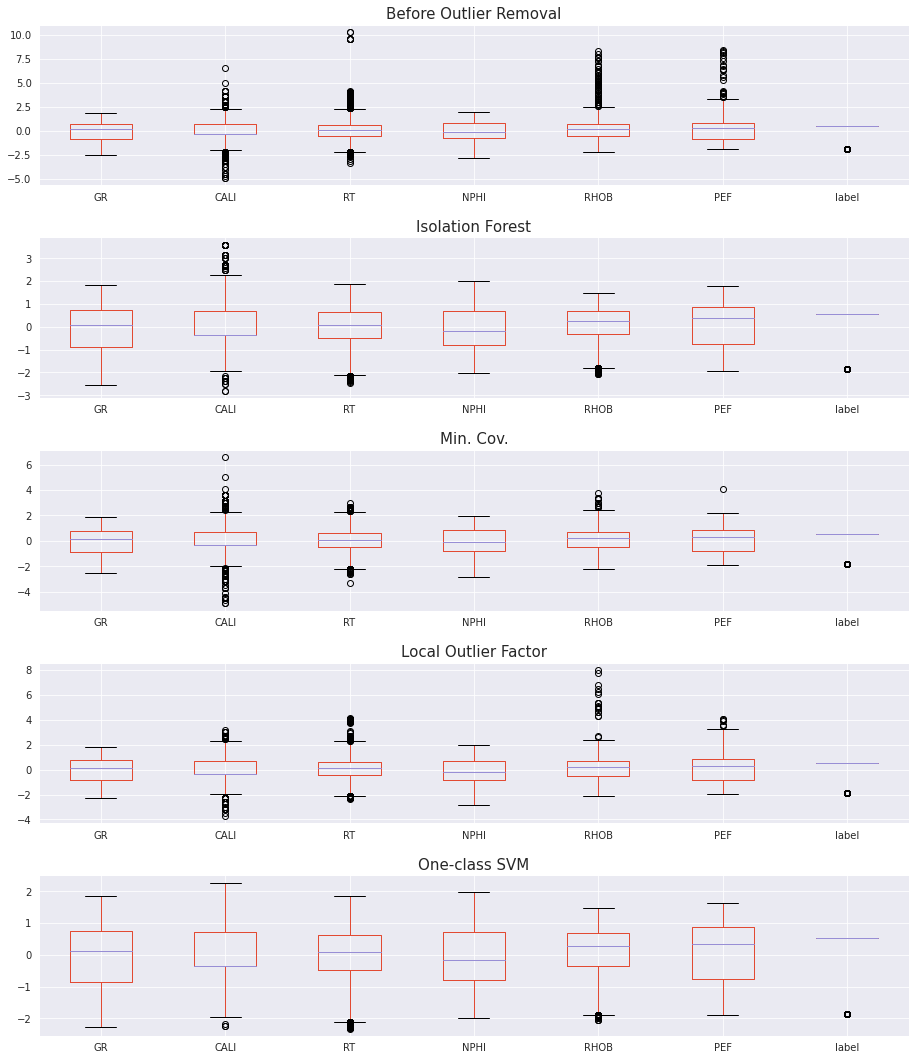

In [ ]:
plt.figure(figsize=(13,15))

plt.subplot(5,1,1)
train_df_yj_norm.boxplot()
plt.title('Before Outlier Removal', size=15)

plt.subplot(5,1,2)
train_df_iso.boxplot()
plt.title('Isolation Forest', size=15)

plt.subplot(5,1,3)
train_df_ee.boxplot()
plt.title('Min. Cov.', size=15)

plt.subplot(5,1,4)
train_df_lof.boxplot()
plt.title('Local Outlier Factor', size=15)

plt.subplot(5,1,5)
train_df_svm.boxplot()
plt.title('One-class SVM', size=15)

plt.tight_layout(1.7)
plt.show()

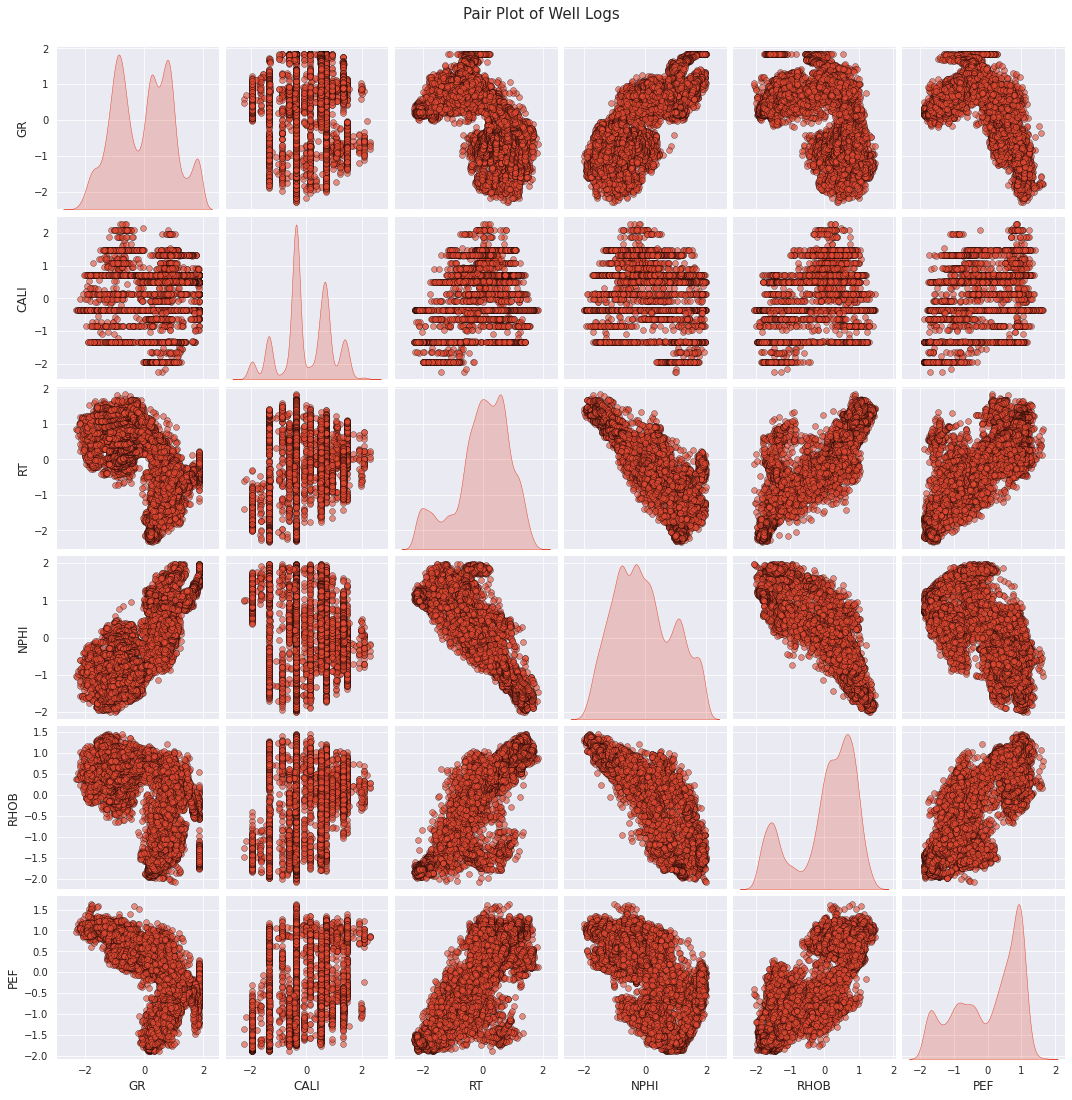

In [ ]:
# a pair plot with a density plot of the 
# diagonal and format the scatter plots.
df_pairplot(train_df_svm, train_df_svm.columns.drop('label'))

In [ ]:
train_df_svm.head()

GR      CALI        RT      NPHI      RHOB       PEF     label
0  0.125676 -1.948485 -1.753597  0.890321 -1.648919 -1.785738  0.538516
1  0.094242 -1.948485 -1.741874  0.810981 -1.587936 -1.800322  0.538516
2  0.100564 -1.948485 -1.744209  0.744178 -1.537510 -1.808799  0.538516
3  0.123552 -1.948485 -1.737222  0.700846 -1.498708 -1.803352  0.538516
4  0.161470 -1.948485 -1.725679  0.683161 -1.463496 -1.788173  0.538516

In [ ]:
train_df_svm.tail()

GR      CALI        RT      NPHI      RHOB       PEF     label
12890  0.932712 -0.628057 -0.711277  0.298216 -0.171323 -1.776222 -1.856953
12893  1.005197 -1.307553 -0.575343  0.438740 -0.347252 -1.712804 -1.856953
12894  0.954603  0.920100 -0.580836  0.405411 -0.348666 -1.600844 -1.856953
12895  0.902642  1.311148 -0.668357  0.387448 -0.326679 -1.527498 -1.856953
12896  0.819447 -1.323612 -0.786671  0.464344 -0.302384 -1.540350 -1.856953

# Modelling

In [ ]:
X_test = test_df_yj_norm
X_train = train_df_svm.drop('label', axis=1)
y_train = y_train_svm.copy()

In [ ]:
pip install catboost

In [ ]:
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from catboost import CatBoostRegressor

In [ ]:
model = ExtraTreesRegressor(n_estimators=800, max_depth=6, random_state=21)
model2=CatBoostRegressor(n_estimators=800,max_depth=6,learning_rate=0.08)
model3 = RandomForestRegressor(n_estimators=800, max_depth=10, random_state=21)

In [ ]:
def train_model(model):
  # Fit the regressor to the training data
  model.fit(X_train, y_train)
  
  score = model.score(X_test, y_test)
  return model, "R-squared of Well 3: {}".format(score)

In [ ]:
model, etr2score = train_model(model)
model2, cbr2score = train_model(model2)
model3, rfr2score = train_model(model3)

0:	learn: 14.3479598	total: 50.7ms	remaining: 40.5s
1:	learn: 13.3300263	total: 53.9ms	remaining: 21.5s
2:	learn: 12.4102547	total: 57ms	remaining: 15.2s
3:	learn: 11.5659324	total: 60ms	remaining: 11.9s
4:	learn: 10.8041815	total: 63.2ms	remaining: 10s
5:	learn: 10.0969973	total: 66.1ms	remaining: 8.75s
6:	learn: 9.4465909	total: 69.2ms	remaining: 7.84s
7:	learn: 8.8447422	total: 72.5ms	remaining: 7.18s
8:	learn: 8.2938777	total: 75.5ms	remaining: 6.63s
9:	learn: 7.7991135	total: 78.4ms	remaining: 6.19s
10:	learn: 7.3448429	total: 81.5ms	remaining: 5.85s
11:	learn: 6.9310376	total: 84.5ms	remaining: 5.54s
12:	learn: 6.5585189	total: 87.5ms	remaining: 5.29s
13:	learn: 6.2185802	total: 90.5ms	remaining: 5.08s
14:	learn: 5.9098696	total: 93.2ms	remaining: 4.88s
15:	learn: 5.6396617	total: 96.2ms	remaining: 4.71s
16:	learn: 5.3992600	total: 99.5ms	remaining: 4.58s
17:	learn: 5.1739605	total: 102ms	remaining: 4.45s
18:	learn: 4.9740896	total: 106ms	remaining: 4.34s
19:	learn: 4.7917406	tot

In [ ]:
def predict_model(model):
  # Predict on well 3
  y_pred = model.predict(X_test)
  rmse = np.sqrt(mean_squared_error(y_test, y_pred))
  return y_pred, "RMSE of Well 3: {}".format(rmse)

In [ ]:
y_pred, etrmse = predict_model(model)
y_pred2, cbrmse= predict_model(model2)
y_pred3, rfrmse = predict_model(model3)

In [ ]:
print(etrmse)
print(" ")
print(cbrmse)
print(" ") 
print(rfrmse)

RMSE of Well 3: 4.792964718302211
 
RMSE of Well 3: 4.4757478152426575
 
RMSE of Well 3: 4.727377843794288


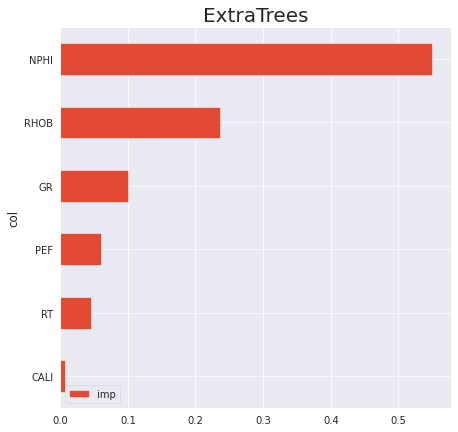

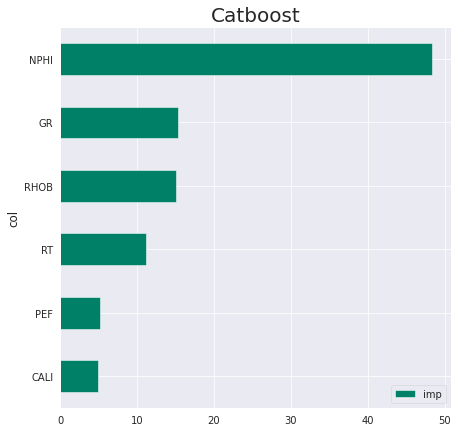

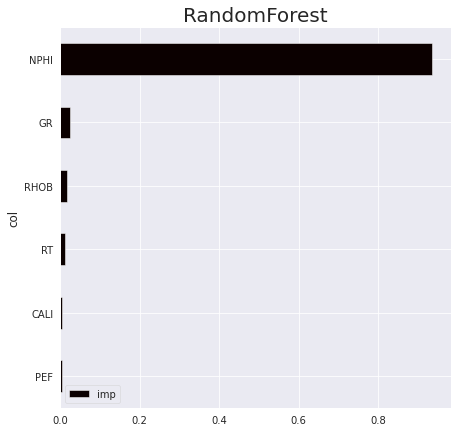

In [ ]:
fea_imp = pd.DataFrame({'imp':model.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7))
plt.title("ExtraTrees", size=20)
plt.savefig('featimp1')

fea_imp = pd.DataFrame({'imp':model2.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), colormap='summer')
plt.title("Catboost", size=20)
plt.savefig('featimp2')

fea_imp = pd.DataFrame({'imp':model3.feature_importances_, 'col': X_train.columns})
fea_imp = fea_imp.sort_values(['imp', 'col'], ascending=[True, False]).iloc[-30:]
_ = fea_imp.plot(kind='barh', x='col', y='imp', figsize=(7, 7), colormap='hot')
plt.title("RandomForest", size=20)
plt.savefig('featimp3')

plt.show()

# Saving and Visualizing predictions

In [ ]:
keeptest['ET_pred'] = y_pred
keeptest['CAT_pred'] = y_pred2
keeptest['RF_pred'] = y_pred3

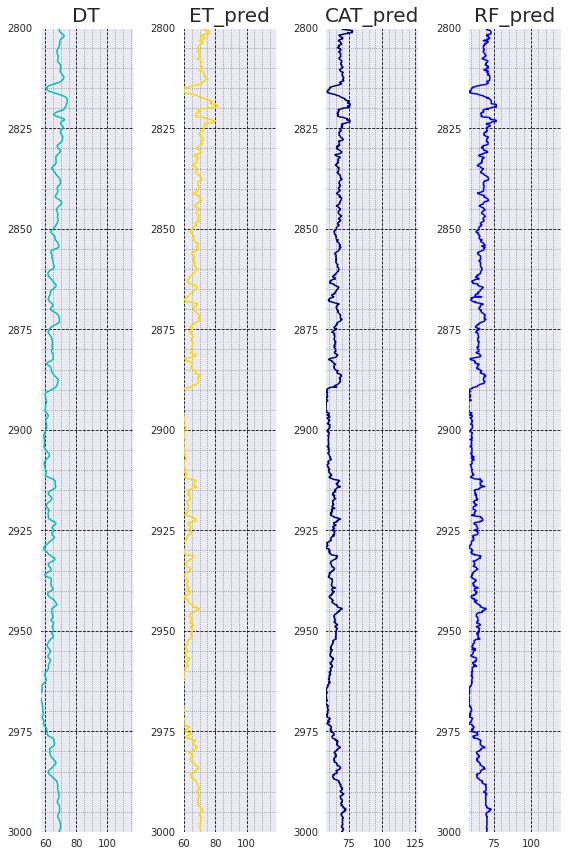

In [ ]:
formation_eval1.doub_logplot(keeptest, logs=['DT', 'ET_pred', 'CAT_pred', 'RF_pred'], \
                             min_depth=2800, max_depth=3000,\
                             plotsize=(8,12))
plt.savefig('preddt')

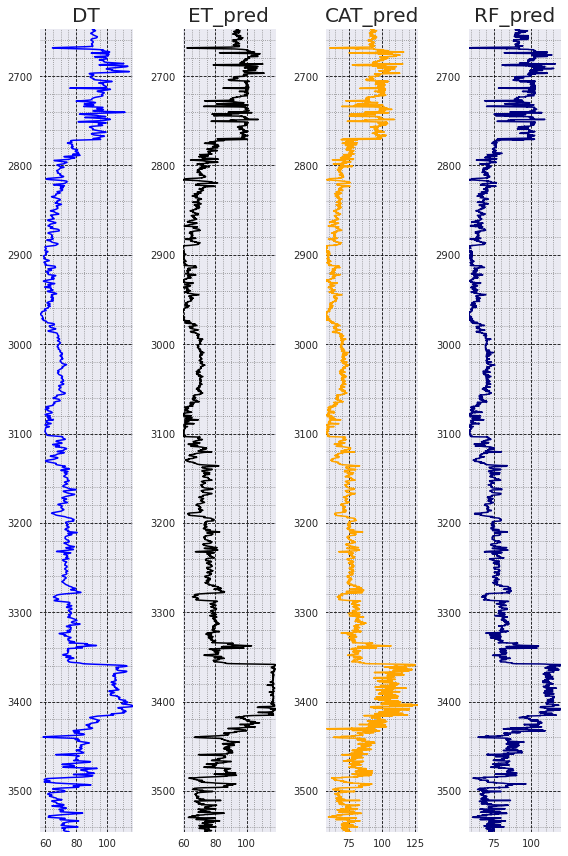

In [ ]:
formation_eval1.doub_logplot(keeptest, logs=['DT', 'ET_pred', 'CAT_pred', 'RF_pred'], \
                             plotsize=(8,12))
plt.savefig('preddt2')

In [ ]:
def pickle_model(model, pickle_name):
  f = open(pickle_name, 'wb')
  pickle.dump(model, f)
  f.close()

In [ ]:
import pickle

In [ ]:
#pickle_model(model, 'et.pickle')